In [1]:
# turn into df

import glob
import pandas as pd

path = '/Users/rubythurs/Documents/dataProcess/Pon_behaviorC'
#'C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC'
files  = glob.glob(path + '/*.json')

df_pon_behaviorC =[]
session3 =[]
session4 =[]
session3_cam1 =[]
session3_cam2 =[]
session3_cam3 =[]
session4_cam1 =[]
session4_cam2 =[]
session4_cam3 =[]

for file in files:
    data = pd.read_json(file)
    data['rT']=  data['touchTimefromInit'] - data['ratio']
    #data = data.loc[data['ratio'] <1]
    filedata = {'filename':file, 'df':data}
    df_pon_behaviorC.append(filedata)
    dfs3 = {'filename':file, 'df':data.loc[data['vel_y'] == 2]}
    dfs4 ={'filename':file, 'df':data.loc[data['vel_y'] == -4]}
    session3.append(dfs3)
    session4.append(dfs4)
    dfs3cam1 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 1]}
    dfs3cam2 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 2]}
    dfs3cam3 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 3]}
    session3_cam1.append(dfs3cam1)
    session3_cam2.append(dfs3cam2)
    session3_cam3.append(dfs3cam3)
    dfs4cam1 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 1]}
    dfs4cam2 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 2]}
    dfs4cam3 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 3]}
    session4_cam1.append(dfs4cam1)
    session4_cam2.append(dfs4cam2)
    session4_cam3.append(dfs4cam3)

for i in range(0,len(df_pon_behaviorC)):
    print(df_pon_behaviorC[i]['filename'])
    print(df_pon_behaviorC[i]['df'].shape)
    # print('session3_cam1 shape: ',session3_cam1[i]['df'].shape)
    # print('session3_cam2 shape: ',session3_cam2[i]['df'].shape)
    # print('session3_cam3 shape: ',session3_cam3[i]['df'].shape)
    # print('session4_cam1 shape: ',session4_cam1[i]['df'].shape)
    # print('session4_cam2 shape: ',session4_cam2[i]['df'].shape)
    # print('session4_cam3 shape: ',session4_cam3[i]['df'].shape)



/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/Jia-08-26-10-00-55-2024.json
(833, 18)
/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/Lin-08-25-13-26-42-2024.json
(915, 18)
/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/Xiaochun-08-26-17-22-46-2024.json
(933, 18)
/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/Ziyi-08-26-18-29-35-2024.json
(902, 18)
/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/HY-08-25-16-50-58-2024.json
(903, 18)


In [2]:

def rtlist_(individual):
    rt = df_pon_behaviorC[individual]['df'].copy().drop(columns=['session','initTime','pauseTime','touchTimefromInit','choice','touchTimefromPause','correctRate','vel_x','camShelfRadius','isParallelToViewCanvas'])
    rtlist_g = rt.loc[rt['vel_y'] == 2].drop(columns=['vel_y'])
    rtlist_0 = rt.loc[rt['vel_y'] == -4].drop(columns=['vel_y'])
    return rtlist_g, rtlist_0

rtlist_(2)[0]

,trial,isCorrect,ratio,camID,camNeck,targetsDistance,rT
0,1,False,0.30,1,3.5,1.20,-0.300000
1,2,False,0.30,1,3.5,1.20,-0.300000
2,3,True,0.30,1,3.5,1.20,1.219844
3,4,True,0.25,1,3.5,1.15,1.316116
4,5,False,0.20,1,2.0,1.10,-0.200000
...,...,...,...,...,...,...,...
478,479,True,1.00,1,0.0,1.70,0.593384
479,480,True,0.40,2,0.0,1.70,0.704004
480,481,True,0.30,3,3.5,1.10,0.581592
481,482,True,0.50,2,0.0,1.70,0.695190


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

individual = 2

k2tr= pd.read_csv(f'/Users/rubythurs/PycharmProjects/count/datacolin/k2_{individual}.csv')
k2tr_=k2tr.T
k2tr_ = k2tr_.index.tolist()
k2tr_ = [int(x) for x in k2tr_]

k3tr= pd.read_csv(f'/Users/rubythurs/PycharmProjects/count/datacolin/k3_{individual}.csv')
k3tr_=k3tr.T
k3tr_ = k3tr_.index.tolist()
k3tr_ = [int(x) for x in k3tr_]
pon = rtlist_(individual)[0]
#
p2 = pon[pon['trial'].isin(k2tr_)]
p3 = pon[pon['trial'].isin(k3tr_)]
p2_r = p2.groupby('ratio')['trial'].count()
p3_r = p3.groupby('ratio')['trial'].count()

p3_view=p3.groupby(['camID','camNeck'])['trial'].count()
p2_view=p2.groupby(['camID','camNeck'])['trial'].count()

trialcount_view=pd.merge(p3_view.to_frame().reset_index(),p2_view.to_frame().reset_index(),
         on=['camID','camNeck'],
         suffixes=['_p3','_p2'])


trialcount_r =pd.merge(p3_r.to_frame().reset_index(),p2_r.to_frame().reset_index(),
         on=['ratio'],
         suffixes=['_p3','_p2'])


In [4]:
trialcount_view

,camID,camNeck,trial_p3,trial_p2
0,1,0.0,6,17
1,1,2.0,8,11
2,1,3.5,8,12
3,2,0.0,8,18
4,2,2.0,4,19
5,2,3.5,5,15
6,3,0.0,8,16
7,3,2.0,6,16
8,3,3.5,12,19


<BarContainer object of 10 artists>

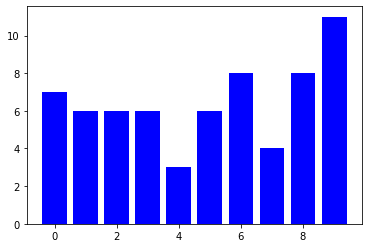

In [52]:
plt.bar(trialcount_r.index,trialcount_r['trial_p3']
        ,color='blue',label='k3')



<BarContainer object of 10 artists>

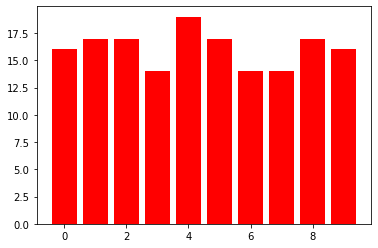

In [44]:
plt.bar(trialcount_r.index,trialcount_r['trial_p2']
        ,color='red',label='k2')

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def f1(i,groupkeys,r98,r0):
    r98= r98.copy().groupby(groupkeys)['rT']
    r0 = r0.copy().groupby(groupkeys)['rT']
    keys = list(r98.groups.keys())

    x98 = []
    x0 = []
    for i in range(0,len(keys)):
        xx=r98.get_group(keys[i]).to_numpy()
        x98.append(xx)
        xx=r0.get_group(keys[i]).to_numpy()
        x0.append(xx)
    x0 = np.concatenate(x0)
    x98 = np.concatenate(x98)
    
    f,p = stats.f_oneway(x98,x0)
    return f,p

r98 = pd.DataFrame()
r0 = pd.DataFrame()

for i in range(0,len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy()
    r['name'] = df_pon_behaviorC[i]['filename']
    r_ = rtlist_(i)[1].copy()
    r_['name'] = df_pon_behaviorC[i]['filename']
    if i==0:
        r98 = r
        r0 = r_
    else: 
        r98 = pd.concat([r98,r])
        r0 = pd.concat([r0  ,r_])

groupkeys = ['camID','camNeck']
#'isCorrect'
#['camID','camNeck']
r98 = r98.copy().groupby(groupkeys)['rT']
keys = list(r98.groups.keys())
x = []
for i in range(0,len(keys)):
    x.append( r98.get_group(keys[i]).to_numpy())
x = np.array(x)

r0 = r0.copy().groupby(groupkeys)['rT']
keys = list(r0.groups.keys())
x_ = []
for i in range(0,len(keys)):
    x_.append( r0.get_group(keys[i]).to_numpy())
x_ = np.array(x_)

f,p = stats.f_oneway(*x)
print(f,p)
f,p = stats.f_oneway(*x_)
print(f,p)

#keys = [round(keys[i],2) for i in range(0,len(keys))]
keys = [str(i) for i in keys]
fig,ax = plt.subplots()
ax.boxplot(x)
ax.violinplot(x)
ax.set_xlabel('Ratio')
ax.set_ylabel('Reaction Time')
ax.set_xticks(range(1,1+len(keys)))
ax.set_xticklabels(keys)
ax.set_title('Reaction Time Grouped by Ratio')


In [ ]:
df = pd.DataFrame(columns=['f','p'])
for i in range(0,len(keys)):
    f,p = stats.f_oneway(x[i],x_[i])
    df = df.append({'f':f,'p':p},ignore_index=True)
    plt.violinplot([x[i],x_[i]])
    plt.xticks([1,2],['r98','r0'])
    plt.title(f'Reaction Time Grouped by {groupkeys}')

df

In [ ]:

import scipy.stats as stats
import numpy as np

def f1(i,groupkeys):
    r98=rtlist_(i)[0].copy().groupby(groupkeys)['rT']
    r0 = rtlist_(i)[1].copy().groupby(groupkeys)['rT']
    keys = list(r98.groups.keys())

    x98 = []
    x0 = []
    for i in range(0,len(keys)):
        xx=r98.get_group(keys[i]).to_numpy()
        x98.append(xx)
        xx=r0.get_group(keys[i]).to_numpy()
        x0.append(xx)
    x0 = np.concatenate(x0)
    x98 = np.concatenate(x98)
    f,p = stats.f_oneway(x98,x0)
    return f,p

r98 = pd.DataFrame()
r0 = pd.DataFrame()

for i in range(0,len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy()
    r['name'] = df_pon_behaviorC[i]['filename']
    r_ = rtlist_(i)[1].copy()
    r_['name'] = df_pon_behaviorC[i]['filename']
    if i==0:
        r98 = r
        r0 = r_
    else: 
        r98 = pd.concat([r98,r])
        r0 = pd.concat([r0  ,r_])

for i in range(0,len(df_pon_behaviorC)):
    f,p = f1(i,['camID','camNeck'])
    print(f,p)
print('-----------------')
for i in range(0,len(df_pon_behaviorC)):
    fr,pr = f1(i,'ratio')
    print(fr,pr)
print('-----------------')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

for i in range(0,len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy().groupby(['camID','camNeck'])['rT']
    keys = list(r.groups.keys())

    x = []
    for i in range(0,len(keys)):
        xx=r.get_group(keys[i]).to_numpy()
        x.append(xx)

    s1,p1 = stats.f_oneway(*x)
    print(s1,p1)


#fig, axs = plt.subplots(1,len(keys), figsize=(12, 2))
#for i in range(0,len(keys)):
#  axs[i].hist(x[i],bins=50)


In [ ]:
for i in range(0,len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy().groupby(['ratio'])['rT']
    keys = list(r.groups.keys())

    x = []
    for i in range(0,len(keys)):
        xx=r.get_group(keys[i]).to_numpy()
        x.append(xx)
    s1,p1 = stats.f_oneway(*x)
    print(s1,p1)

In [ ]:
for i in range(0,len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy().groupby(['isCorrect'])['rT']
    keys = list(r.groups.keys())

    x = []
    for i in range(0,len(keys)):
        xx=r.get_group(keys[i]).to_numpy()
        x.append(xx)
    s1,p1 = stats.f_oneway(*x)
    print(s1,p1)

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(5, 2, figsize=(6, 14))

for i in range(0, len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy()

    axs[i,0].hist(r['rT'], bins=50)
    axs[i,0].set_title('Histogram of Response Time')
    axs[i,0].set_xlabel('Response Time (s)')
    axs[i,0].set_ylabel('Frequency')


    stats.probplot(r['rT'], dist="norm", plot=axs[i,1])
    axs[i,1].set_title('Normal Probability Plot')
plt.rcParams.update({'font.size': 12})

plt.suptitle('Response Time Distribution, group g=9.8', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import scipy.stats as stats

def rtstats_(which):

    df = pd.DataFrame(columns=['f_oneway','p'])

    for i in range(0,len(df_pon_behaviorC)):
        rtlist_g = rtlist_(i)[0].copy()
        idcs = []
        rtlists = []
        d =  rtlist_g.groupby(which)['rT'].indices
        k = list(d.keys())
      
        for key in k:
            idx = rtlist_g.groupby(which)['rT'].indices[key]
            idcs.append(idx)
            rtlists.append(rtlist_g.loc[idx,'rT'])
    
        s1,p1 = stats.f_oneway(*rtlists)
        df.loc[i] =[s1,p1]
    return df

rtstats_('camID')


In [ ]:
rtstats_('camNeck')


In [ ]:
rtstats_('targetsDistance')

In [ ]:
rtstats_(['camID','camNeck'])

In [ ]:
rtstats_('isCorrect')

In [ ]:
rtstats_('ratio')

In [ ]:

for i in range(0,len(df_pon_behaviorC)):
    rtlist_g = rtlist_(i)[0].copy()
    rtmean_g_isC = rtlist_g.groupby(['isCorrect'])['rT'].mean().to_frame()
    rtstd_g_isC = rtlist_g.groupby(['isCorrect'])['rT'].std().to_frame()    
    rtmean_g_isC[f'rtmean{i}'] = rtmean_g_isC['rT']
    rtmean_g_isC = rtmean_g_isC.drop(columns=['rT']).copy()
    rtstd_g_isC[f'rtstd{i}'] = rtstd_g_isC['rT']
    rtstd_g_isC = rtstd_g_isC.drop(columns=['rT']).copy()
    k0 = pd.merge(rtmean_g_isC,rtstd_g_isC,how='left',on='isCorrect',suffixes=('_mean','_std'))
    if i == 0:
        k = k0
    else:
        k = pd.merge(k,k0,how='left',on='isCorrect')
k

In [ ]:
def rt_g(which,individual):
    rtlist_g = rtlist_(individual)[0].copy()
    rtmean_g_ = rtlist_g.groupby([which])['rT'].mean().to_frame()
    rtstd_g_ = rtlist_g.groupby([which])['rT'].std().to_frame()
    return pd.merge(rtmean_g_,rtstd_g_,how='left',on=which,suffixes=(f'_mean{i}',f'_std{i}'))

rt_g('ratio',1)
rt_g('camNeck',1)
rt_g('camID',1)
#rt_g('choice',1)
#rt_g('targetsDistance',1)
#

In [ ]:

for i in range(0,len(df_pon_behaviorC)):
    rt_g_i = rt_g('ratio',i)
    if i == 0:
        rt_g_group = rt_g_i
    else:
        rt_g_group = pd.merge(rt_g_group,rt_g_i,how='left',on='ratio')
rt_g_group.drop(columns=['rT_mean0','rT_mean1','rT_mean2','rT_mean3','rT_mean4'])

In [ ]:
rt_g_group.drop(columns=['rT_std0','rT_std1','rT_std2','rT_std3','rT_std4'])

In [ ]:
for i in range(0,len(df_pon_behaviorC)):
    rtlist_g = rtlist_(i)[0].copy()
    rtmean_g_i = rtlist_g.groupby(['camID','camNeck'])['rT'].mean().to_frame().reset_index(drop=False)
    rtstd_g_i = rtlist_g.groupby(['camID','camNeck'])['rT'].std().to_frame().reset_index(drop=False)
    rt_g_i = pd.merge(rtmean_g_i,rtstd_g_i,how='left',on=['camID','camNeck'],suffixes=(f'_mean{i}',f'_std{i}'))
    if i == 0:
        rt_g_cam = rt_g_i
    else:
        rt_g_cam = pd.merge(rt_g_cam,rt_g_i,how='left',on=['camID','camNeck'])
rt_g_cam.drop(columns=['rT_mean0','rT_mean1','rT_mean2','rT_mean3','rT_mean4'])

In [ ]:
rt_g_cam.drop(columns=['rT_std0','rT_std1','rT_std2','rT_std3','rT_std4'])

In [ ]:
def crlist_(individual):
    crlist = df_pon_behaviorC[individual]['df'].copy().drop(columns=['session','rT','initTime','pauseTime','touchTimefromInit','touchTimefromPause','correctRate','vel_x','camShelfRadius','isParallelToViewCanvas'])
    crlist_g = crlist.loc[crlist['vel_y'] == 2].drop(columns=['vel_y'])
    crlist_0 = crlist.loc[crlist['vel_y'] == -4].drop(columns=['vel_y'])
    return crlist_g, crlist_0
crlist_(0)[0]

所有人放在一个表里

In [ ]:

def cr(which,individual):
    crlist_g = crlist_(individual)[1]
    crlist_which_g=crlist_g.copy().groupby(which)
    r_which_g = crlist_which_g['isCorrect'].mean().reset_index(drop=False)
    #print(crlist_which_g['isCorrect'].count())
    r_which_g[f'cr{individual}'] = r_which_g['isCorrect']
    r_which_g = r_which_g.drop(columns=['isCorrect'])
    return r_which_g

def cr_which_group(which):
    cr_which_i = []
    for i in range(0,len(df_pon_behaviorC)):
        cr_which_i.append(cr(which=which,individual=i))

    a = cr_which_i[0]
    for i in range(0,len(cr_which_i)-1):
        a = pd.merge(a,cr_which_i[i+1],how='left',on=which)
    return a

#cr_which_group('targetsDistance')
cr_which_group('ratio')
#cr_which_group('camNeck')
#cr_which_group('choice')
#cr_which_group('camID')

In [ ]:
df = cr_which_group('ratio')
import matplotlib.pyplot as plt

for i in range(5):
    plt.scatter(df['ratio'], df[f'cr{i}'], label=f'cr{i}')


plt.title('Scatter Plot of cr Values,g=0')
plt.xlabel('ratio values')
plt.ylabel('cr Values')
plt.ylim(0, 1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df = cr_which_group('ratio').copy()
df['ratio'] = df['ratio'].round(2)

df_melt = pd.melt(df, id_vars=['ratio'], value_vars=[f'cr{i}' for i in range(5)])

plt.violinplot([df_melt.loc[df_melt['ratio'] == r, 'value'] for r in df_melt['ratio'].unique()], showmeans=True)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Violin Plot of cr Values by Ratio,g=0')
plt.xlabel('Ratio')
plt.ylabel('Correct rate')
plt.ylim(0, 1)
plt.xticks(range(len(df_melt['ratio'].unique())), df_melt['ratio'].unique())
plt.show()

In [ ]:
cr_n_r_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camNeck','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_n_r_g_i.append(x)

e = cr_n_r_g_i[0]
for i in range(0,len(cr_n_r_g_i)-1):
    e = pd.merge(e,cr_n_r_g_i[i+1],how='left',on=['camNeck','ratio'])

e

In [ ]:
cr_td_r_g_i = []
g = 0
glist = [9.8,0]

for i in range(0,len(df_pon_behaviorC)):
    ##
    x = crlist_(i)[g].copy().groupby(['targetsDistance','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_td_r_g_i.append(x)


b = cr_td_r_g_i[0] 
for i in range(0,len(cr_td_r_g_i)-1):
    b = pd.merge(b,cr_td_r_g_i[i+1],how='left',on=['targetsDistance','ratio'])

df = pd.DataFrame(columns=['f','p'])
for i in range(0,len(df_pon_behaviorC)):
    x = b.loc[:,[f'cr{i}']]
    xx = x.loc[1.10]
    tdlist = crlist_(0)[g]['targetsDistance'].unique() ##
    tdlist = np.sort(tdlist)
    for index,item in enumerate(tdlist):
        if index < len(tdlist)-1:
            a = x.loc[tdlist[index+1]]
            xx = pd.merge(xx,a,how='left',on=['ratio'],suffixes=('',f'_{index+1}'))
        else:break
    xx = xx.reset_index('ratio').to_numpy().T

f,p = stats.f_oneway(*xx)
print(f,p)


    #tarD 有差异

td = [0]
x = tdlist.shape[0]
for i in range(x):
    td.append(str(tdlist[i].round(2)))

plt.violinplot([xx[0],xx[1],xx[2],xx[3],xx[4]])
plt.boxplot([xx[0],xx[1],xx[2],xx[3],xx[4]])
plt.title(f'Correct rate with targets distance,g={glist[g]}')
plt.xticks(range(len(td)),td)
plt.xlabel('Target distance')
plt.ylabel('Correct rate')
plt.ylim(0,1.1)
plt.legend(loc = 'best',bbox_to_anchor=(1.05, 1))
plt.rcParams['font.size'] = 9
plt.show()



In [ ]:
len(xx.T)

In [ ]:


cr_id_r_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camID','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_id_r_g_i.append(x)

a = cr_id_r_g_i[0]
for i in range(0,len(cr_id_r_g_i)-1):
    a = pd.merge(a,cr_id_r_g_i[i+1],how='left',on=['camID','ratio'])


In [ ]:

for i in range(0,len(df_pon_behaviorC)):
    x = a.loc[:,[f'cr{i}']]
    xx = x.loc[1]
    for i in range(1,3):
        xx = pd.merge(xx,x.loc[i+1],how='left',on=['ratio'])
    xx = xx.reset_index().drop(columns=['ratio']).to_numpy().T
    f2,p2 = stats.f_oneway(xx[0],xx[1],xx[2])
    print(f2,p2)
    
#camID 没差异

In [ ]:
sampels = []
for i in range(1,4):
    x = a.loc[i].reset_index(drop=False).drop(columns=['ratio']).to_numpy()
    sampels.append(x)

f,p = stats.f_oneway(sampels[0],sampels[1],sampels[2])
print(f,p)
# 个体之间没有显著差异


##C_sure

In [ ]:

cr_id_n_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x0 = crlist_(i)[0].copy() ##
    x0  = x0.loc[x0['ratio']<=0.4] ##
    x=x0.groupby(['camID','camNeck'])['isCorrect'].mean().to_frame()
    #print(x0.groupby(['camID','camNeck'])['isCorrect'].count())
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    x = x.reset_index(drop=False)
    cr_id_n_g_i.append(x)

c = cr_id_n_g_i[0]
for i in range(0,len(cr_id_n_g_i)-1):
    c = pd.merge(c,cr_id_n_g_i[i+1],how='left',on=['camID','camNeck'])
c_sure = c
c_sure

In [ ]:

cr_cams = c_sure.drop(columns=['camNeck','camID']).to_numpy()
fs,ps = stats.f_oneway(*cr_cams.T)
print(fs,ps)

# 机位显示差异
fig,ax1 = plt.subplots()
bp = ax1.boxplot(cr_cams.T)
num_boxes = len(cr_cams)
medians = np.empty(num_boxes)

for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(len(cr_cams.T)):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, 'k')
    medians[i] = median_y[0]
    # 添加文本标签
    ax1.text(i+1, 1, f'{medians[i]:.2f}', ha='center', va='bottom')

plt.title('Correct rate with views,ratio<=0.4,g=9.8')
plt.xlabel('View index')
plt.ylabel('Correct rate')
plt.ylim(0,1.1)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.rcParams['font.size'] = 9
plt.show()



In [ ]:
x =c.shape[0]

df = c_sure.copy()
l= []
for i in range(x):
    a = df['camID'][i],df['camNeck'][i]
    l.append(a)

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

for i in range(5):
    plt.scatter(df.index, df[f'cr{i}'], label=f'cr{i}')

plt.title('Correct rate at different views,g=0')
plt.xlabel('View indices')
plt.ylabel('Correct rate')
plt.ylim(0,1)
plt.xticks(range(len(l)),labels=l)
plt.legend(loc = 'best',bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
df = c_sure.copy()

df['index'] = df.index
df_melt = pd.melt(df, id_vars='index', value_vars=['cr0', 'cr1', 'cr2', 'cr3', 'cr4'],)

plt.figure(figsize=(8,5))
plt.violinplot([df_melt.loc[df_melt['index'] == r, 'value'] for r in df_melt['index'].unique()],
               showmeans=True)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Violin Plot of cr Values by Views ,g=0') ##
plt.xticks(range(len(l)),labels=l)
plt.xlabel('view indices')
plt.ylabel('Correct rate')
plt.ylim(0, 1)
plt.legend(loc = 'best',bbox_to_anchor=(1.05, 1))
plt.rcParams['font.size'] = 16
plt.show()

In [ ]:
cr_id_n_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camID','camNeck'])['isCorrect'].mean().to_frame()
   # print(crlist_(i)[0].copy().groupby(['camID','camNeck'])['isCorrect'].count())
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    x = x.reset_index(drop=False)
    cr_id_n_g_i.append(x)

c = cr_id_n_g_i[0]
for i in range(0,len(cr_id_n_g_i)-1):
    c = pd.merge(c,cr_id_n_g_i[i+1],how='left',on=['camID','camNeck'])
c

In [ ]:
for i in range(0,len(df_pon_behaviorC)):
    x = a.loc[:,[f'cr{i}']]
    xx = x.loc[1]
    for i in range(1,3):
        xx = pd.merge(xx,x.loc[i+1],how='left',on=['ratio'])
    xx = xx.reset_index().drop(columns=['ratio']).to_numpy().T
    f,p = stats.f_oneway(xx[0],xx[1],xx[2])
    print(f,p)
#camID 没差异

In [ ]:
# read 2afc time

import matplotlib.pyplot as plt

def read2afcTime(session3_cam1,name):
    tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
    color = ['yellow','b','green','pink','orange','purple']
    list= []
    fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
    fig.suptitle(f'{name}, 2afc time')
    for i,item in enumerate(tarDislist):
        d = {'tarD':item,'l':[]}
        list.append(d)
        ax[i].set_title(f'{name}, tarDistance: {item.round(2)}')
        # compare across inidividual
        for j in range(0,len(df_pon_behaviorC)):
            toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
            ttimtIni_s3_id1 = toplt['rT'].mean().reset_index(drop=False)
            data = {'inidividual':j,'rT':ttimtIni_s3_id1['rT'].tolist(),'ratio':ttimtIni_s3_id1['ratio'].round(2).tolist()}
            list[i]['l'].append(data)
            ax[i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['rT'],color=color[j])
            ax[i].set_ylim(0,2)

    fig, ax = plt.subplots(figsize=(7, 4))

    for t,item in enumerate(tarDislist):
        listrT=[]
        for i , item in enumerate(sorted(df_pon_behaviorC[0]['df']['ratio'].unique())):
            data = {'ratio':item,'rT':[]}
            listrT.append(data)
            #print(item.round(2))
        # print(list[t]['tarD'])
            for j in range(0,len(df_pon_behaviorC)):
                listrT[i]['rT'].append(list[t]['l'][j]['rT'][i])

        x = sorted(df_pon_behaviorC[0]['df']['ratio'].unique())
        y = [np.mean(listrT[0]['rT']),np.mean(listrT[1]['rT']),np.mean(listrT[2]['rT']),np.mean(listrT[3]['rT']),np.mean(listrT[4]['rT'])
            ,np.mean(listrT[5]['rT']),np.mean(listrT[6]['rT']),np.mean(listrT[7]['rT']),np.mean(listrT[8]['rT']),np.mean(listrT[9]['rT'])]
        xerr = 0
        yerr = [np.std(listrT[0]['rT']),np.std(listrT[1]['rT']),np.std(listrT[2]['rT']),np.std(listrT[3]['rT']),np.std(listrT[4]['rT'])
            ,np.std(listrT[5]['rT']),np.std(listrT[6]['rT']),np.std(listrT[7]['rT']),np.std(listrT[8]['rT']),np.std(listrT[9]['rT'])]

        ls = 'dotted'
        ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls,label=f'tar{tarDislist[t].round(2)}')
        ax.set_ylim(0,2)
        plt.xticks(x)
        plt.suptitle(f'RTtoRatio {name}')##
        plt.legend()
        plt.savefig(f'{name} RTtoRatio.png') 

In [ ]:
read2afcTime(session3_cam1,'session3_cam1')
read2afcTime(session3_cam2,'session3_cam2')
read2afcTime(session3_cam3,'session3_cam3')
read2afcTime(session4_cam1,'session4_cam1')
read2afcTime(session4_cam2,'session4_cam2')
read2afcTime(session4_cam3,'session4_cam3')

In [ ]:
#fig, ax = plt.subplots(2* len(df_pon_behaviorC),1, figsize=(25, 15))
def getCR(session3_cam1):
    session3_cam1_CR =[]
    for i,item in enumerate(session3_cam1):
        list = item['df'].groupby('isCorrect').size().reset_index(name='counts')
        cr = list['counts'][1]/(list['counts'][0]+list['counts'][1])
        session3_cam1_CR.append(cr.round(3))
    return(session3_cam1_CR) #session3_cam1_CR

list = [session3_cam1,
session3_cam2,
session3_cam3,
session4_cam1,
session4_cam2,
session4_cam3]

liststr = ['session3_cam1',
'session3_cam2',
'session3_cam3',
'session4_cam1',
'session4_cam2',
'session4_cam3']

import numpy as np

listCR = []
listCR_ = []
for i,item in enumerate(list):
    data = getCR(item)
    mean = numpy.mean(data)
    std = numpy.std(data)
    cr = {'group':liststr[i],'cr_individuals':data,'mean':mean,'std':std}
    listCR.append(cr)
    listCR_.append(data)
listCR

pdf = pd.DataFrame(listCR_)
pdf.to_excel('listCR_.xlsx',index=True)

In [ ]:
x = [1,2,3]
y = [np.mean(listCR_[0]), np.mean(listCR_[1]), np.mean(listCR_[2])]
y2 = [np.mean(listCR_[3]), np.mean(listCR_[4]), np.mean(listCR_[5])]
xerr = 0
yerr = [np.std(listCR_[0]), np.std(listCR_[1]), np.std(listCR_[2])]
yerr2 = [np.std(listCR_[3]), np.std(listCR_[4]), np.std(listCR_[5])]
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))
ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls,label='g=9.8')
ax.errorbar(x, y2, xerr=xerr, yerr=yerr2, linestyle=ls,label='g=0')
ax.set_ylim(0,1)
plt.xticks(x)
plt.suptitle('camId CR ')##
plt.legend()
#plt.savefig('pon_CR_camID_allRatio.png') 

In [ ]:
# read 2afc CR change\
import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(df_pon_behaviorC),1, figsize=(25, 15))
fig.suptitle('2afc CR to time')
for i,item in enumerate(df_pon_behaviorC):
    ax[i].set_title(str(i))
    a=item['df']['correctRate'].astype(float)
    x=item['df']['initTime'].astype(float)
    ax[i].plot(x,a)
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(0,1800)
plt.savefig('2afc_CRtoTime.png')

In [ ]:
# read 2afc time
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(2,len(tarDislist), figsize=(25, 5))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    print(item.round(2))
    ax[0,i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id1 = ttimtIni_s3_id1
        ttimtPaus_s3_id1['touchTimefromPause'] = ttimtIni_s3_id1['touchTimefromInit']- ttimtIni_s3_id1['ratio']
       
        ax[0,i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['touchTimefromInit'],color=color[j])
        ax[0,i].set_ylim(0,2)
        
        ax[1,i].plot(ttimtPaus_s3_id1['ratio'],ttimtPaus_s3_id1['touchTimefromPause'],color=color[j])
        ax[1,i].set_ylim(0,2)

fig, ax = plt.subplots(2,len(tarDislist), figsize=(25, 5))
fig.suptitle('session4_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[0,i].set_title(f'session4_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session4_cam1[j]['df'].loc[session4_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s4_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s4_id1 = ttimtIni_s4_id1
        ttimtPaus_s4_id1['touchTimefromPause'] = ttimtIni_s4_id1['touchTimefromInit']- ttimtIni_s4_id1['ratio']
        ax[0,i].plot(ttimtIni_s4_id1['ratio'],ttimtIni_s4_id1['touchTimefromInit'],color=color[j])
        ax[0,i].set_ylim(0,2)
        
        ax[1,i].plot(ttimtPaus_s4_id1['ratio'],ttimtPaus_s4_id1['touchTimefromPause'],color=color[j])
        ax[1,i].set_ylim(0,2)


In [ ]:
# read 2afc time
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam2, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam2, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam2[j]['df'].loc[session3_cam2[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id2 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id2['ratio'],ttimtIni_s3_id2['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam3, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam3, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam3[j]['df'].loc[session3_cam3[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id3 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id3['ratio'],ttimtIni_s3_id3['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)



In [ ]:
# read 2afc time from pause
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id1 = ttimtIni_s3_id1
        ttimtPaus_s3_id1['touchTimefromPause'] = ttimtIni_s3_id1['touchTimefromInit']- ttimtIni_s3_id1['ratio']
       
        ax[i].plot(ttimtPaus_s3_id1['ratio'],ttimtPaus_s3_id1['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam2, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam2, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam2[j]['df'].loc[session3_cam2[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id2 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id2 = ttimtIni_s3_id2
        ttimtPaus_s3_id2['touchTimefromPause'] = ttimtIni_s3_id2['touchTimefromInit']- ttimtIni_s3_id2['ratio']
       
        ax[i].plot(ttimtPaus_s3_id2['ratio'],ttimtPaus_s3_id2['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam3, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam3, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam3[j]['df'].loc[session3_cam3[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id3 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id3 = ttimtIni_s3_id3
        ttimtPaus_s3_id3['touchTimefromPause'] = ttimtIni_s3_id3['touchTimefromInit']- ttimtIni_s3_id3['ratio'] 
       
        ax[i].plot(ttimtPaus_s3_id3['ratio'],ttimtPaus_s3_id3['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

In [ ]:
## compare mean and std and distribution
## plot  x <- tar ,indipendently ratio
## compare acreoss view perspectives
## or substract first then average

In [ ]:
## read eye
## define event
## event coralate with frame
## plot pupil
